# Decision Tree (Diabetes Prediction)

## Penjelasan Kolom:

###
- Age = Umur 
- Gender = Jenis Kelamin
- Polyuria = Sering BAK
- Polydipsia = Rasa Haus Berlebih
- sudden weight loss = Berat Badan Menurunn
- weakness = Mudah Kelelahan
- Polyphagia = Nafsu Makan Berlebih
- Genital thrush = Infeksi Jamur Di Area Genital
- visual blurring = Gangguan Penglihatan
- Itching = Gatal Pada Kulit Tanpa Sebab
- Irritability = Mudah Emosi/Marah
- delayed healing = Luka Membutuhkan Waktu Lama Untuk Sembuh
- partial paresis = Otot Lemah/Lumpuh Sebagian
- muscle stiffness = Kekakuan Pada Otot
- Alopecia = Kehilangan Rambut/Kebotakan
- Obesity = Kelebihan Berat Badan
- class(target) = Klasifikasi Menderita Diabetes (Negatif/Positif)

## A. Data Preparation

### A.1 Import Libraries

In [158]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### A.2 Load Data

In [159]:
try:
    df = pd.read_csv('diabetes_data_upload.csv')
    print("Berhasil Membaca Data")
except Exception as e:
    print("Gagal Membaca Data")

Berhasil Membaca Data


### A.3 Melihat Dimensi Data

In [160]:
df.shape

(520, 17)

In [161]:
df.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity', 'class'],
      dtype='object')

### A.4 Menampilkan 5 Data Teratas dan Terbawah

In [162]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [163]:
df.tail()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative
519,42,Male,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Negative


### A.5 Menampilkan Informasi Data

In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

### A.6 Cek Data Duplikat

In [165]:
df.duplicated().sum()

np.int64(269)

### A.7 Menampilkan Nilai Hilang

In [166]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

<Axes: ylabel='Age'>

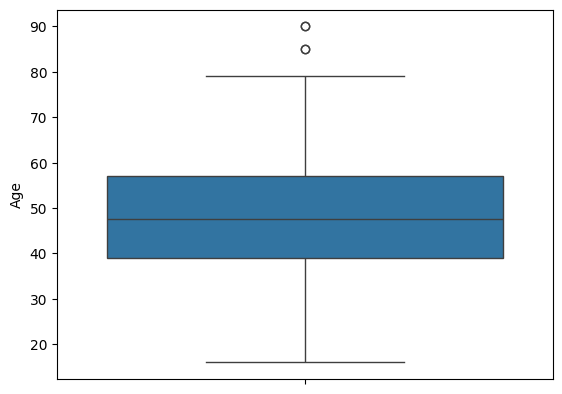

In [167]:
sns.boxplot(df['Age'])

## B. Exploratory Data Analysis (EDA)

### B.1 Univariate Analysis

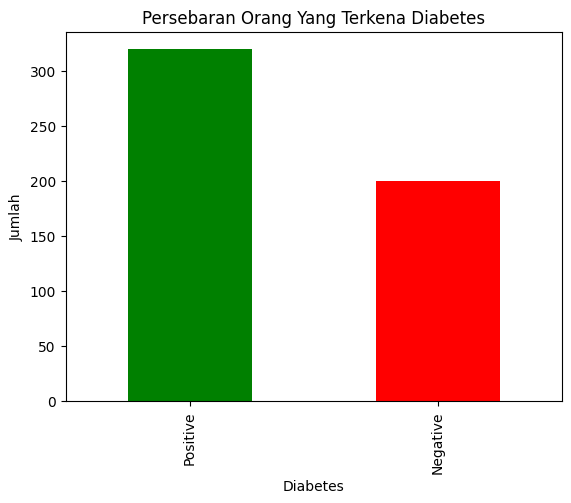

In [168]:
df['class'].value_counts().plot(kind='bar', color=['green', 'red']).set_title("Persebaran Orang Yang Terkena Diabetes")
plt.xlabel("Diabetes")
plt.ylabel("Jumlah")
plt.show()

In [169]:
df['class'].value_counts(normalize= True) * 100

class
Positive    61.538462
Negative    38.461538
Name: proportion, dtype: float64

<Axes: >

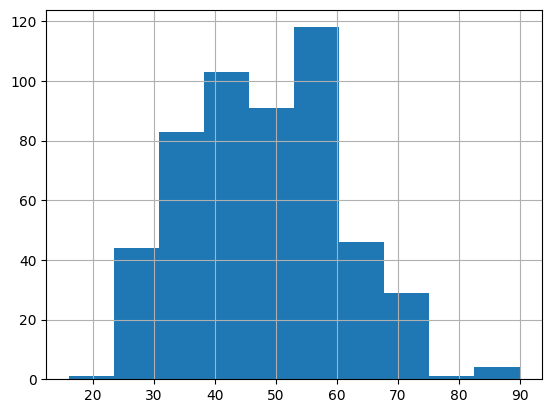

In [170]:
df['Age'].hist()

### B.2 Bivariate Analysis

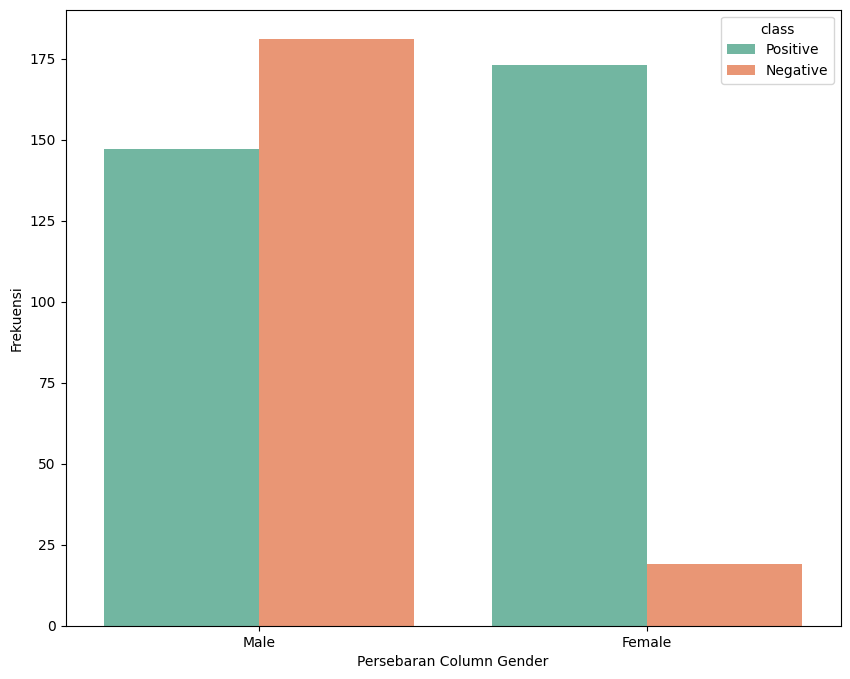

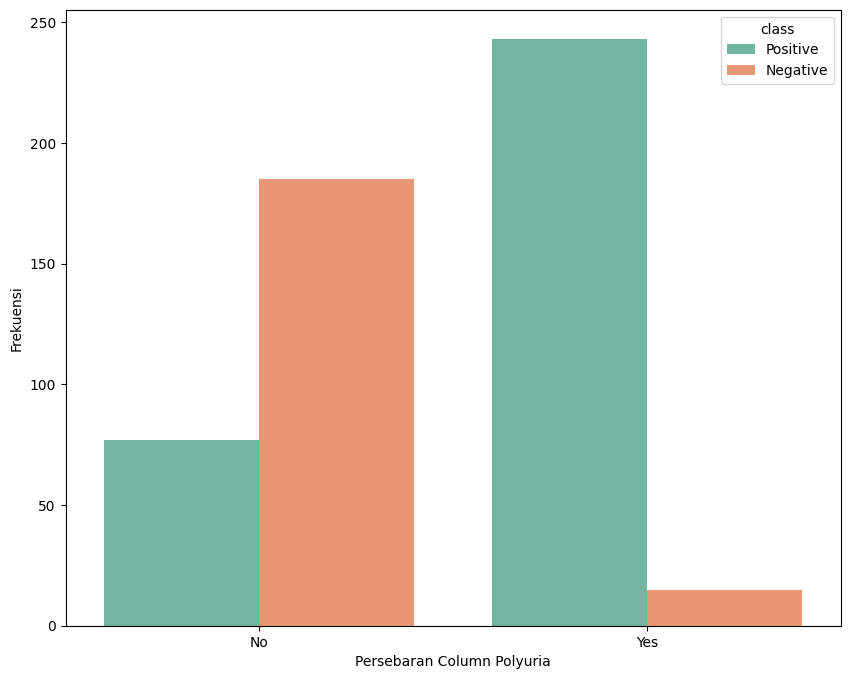

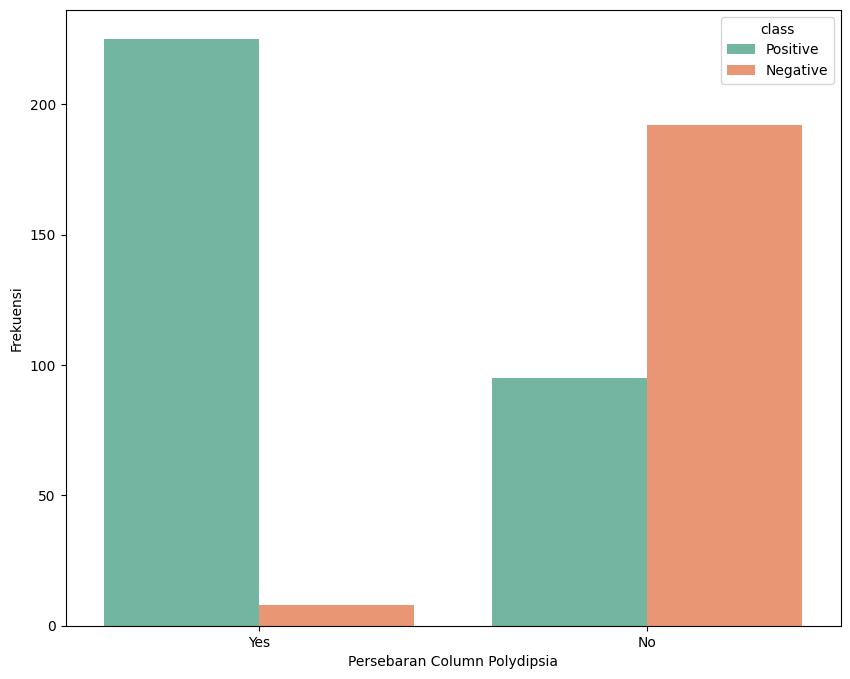

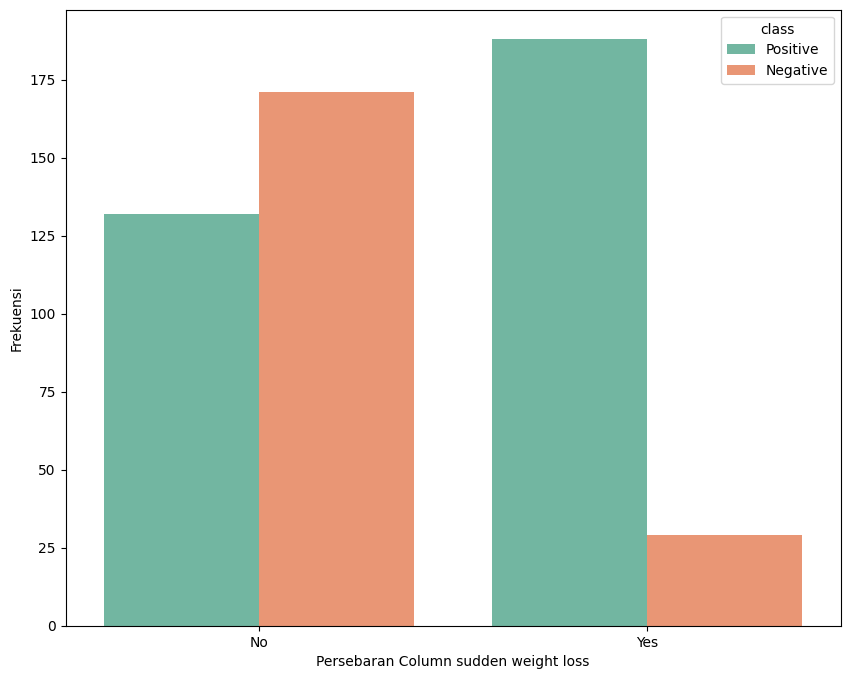

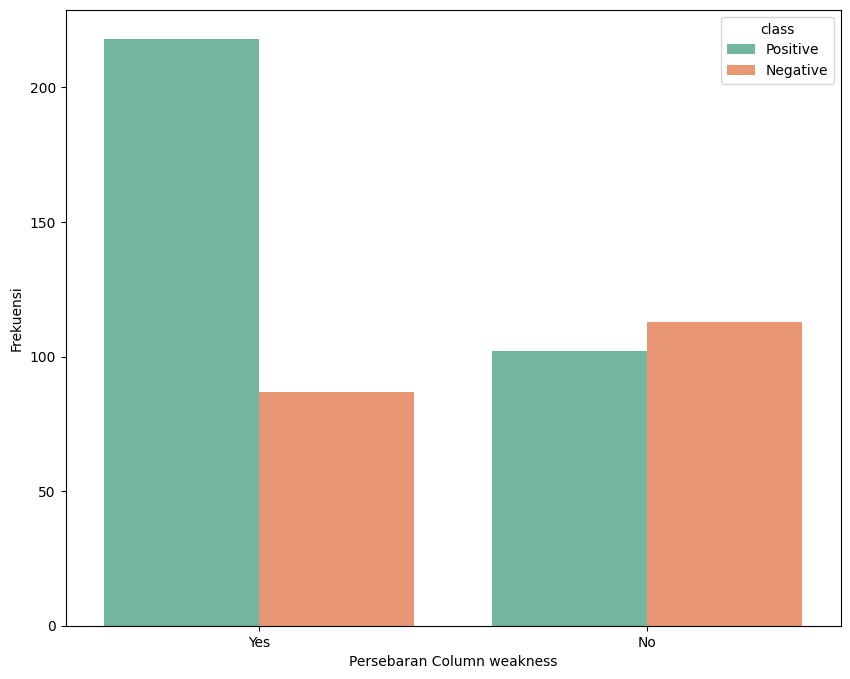

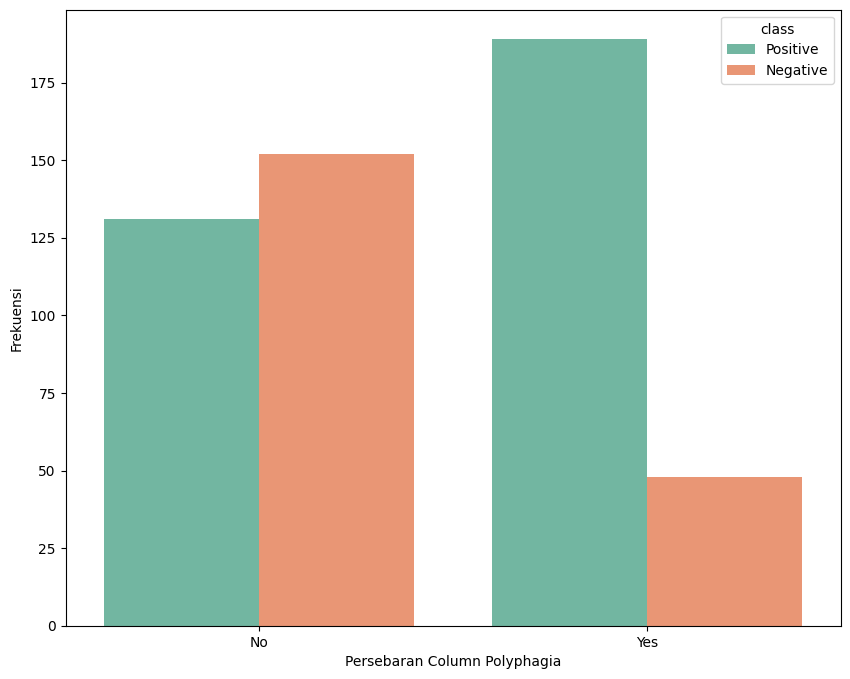

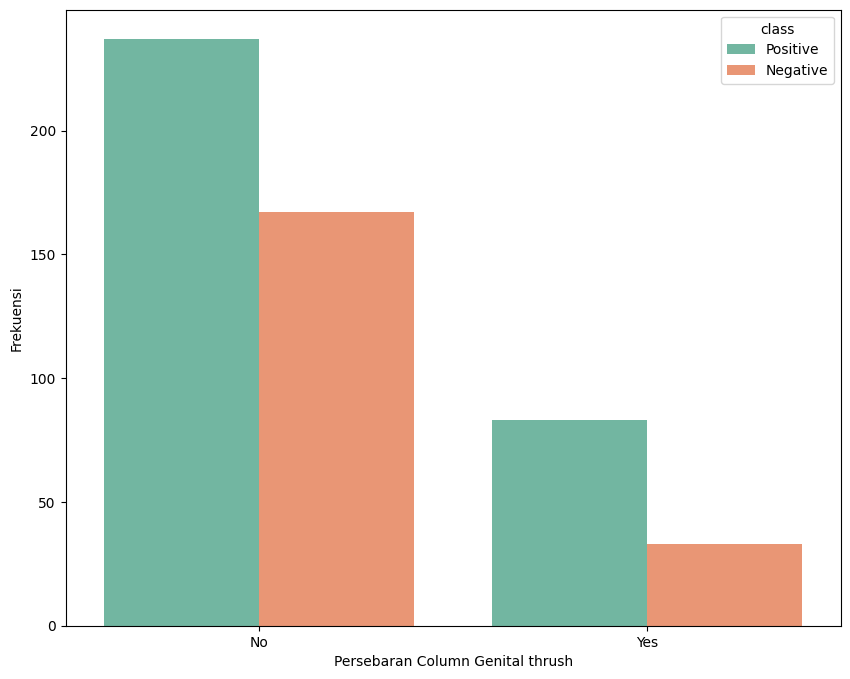

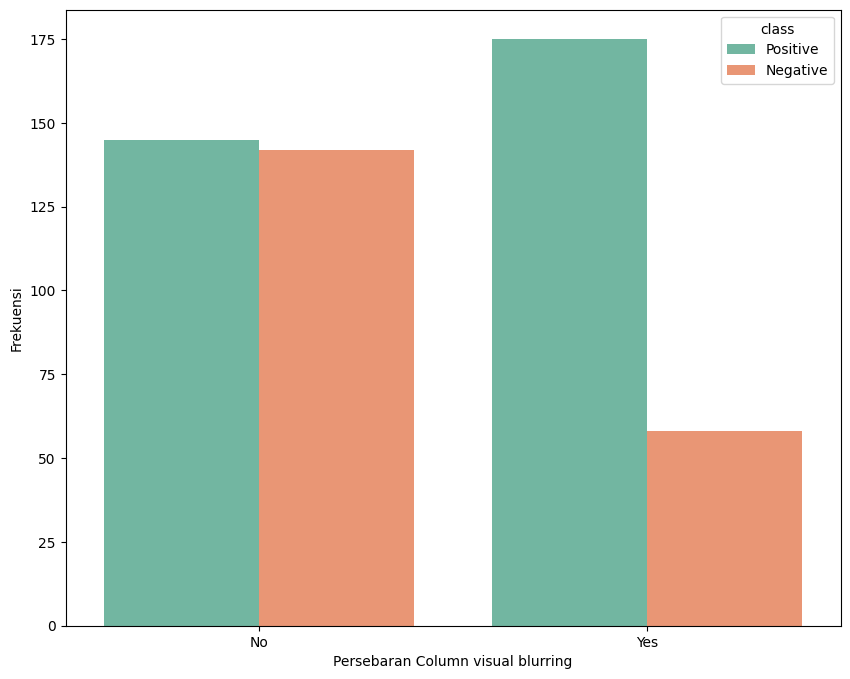

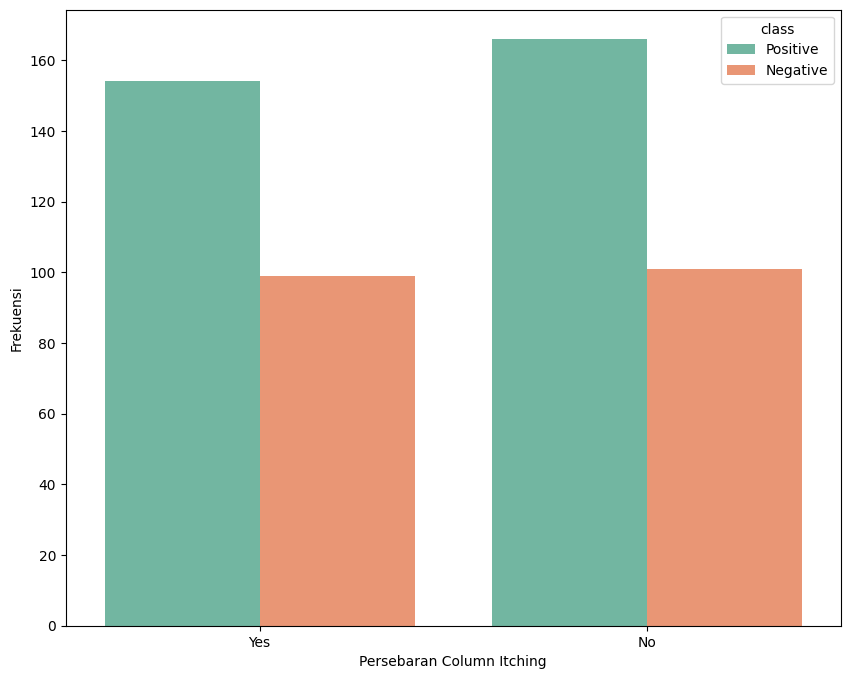

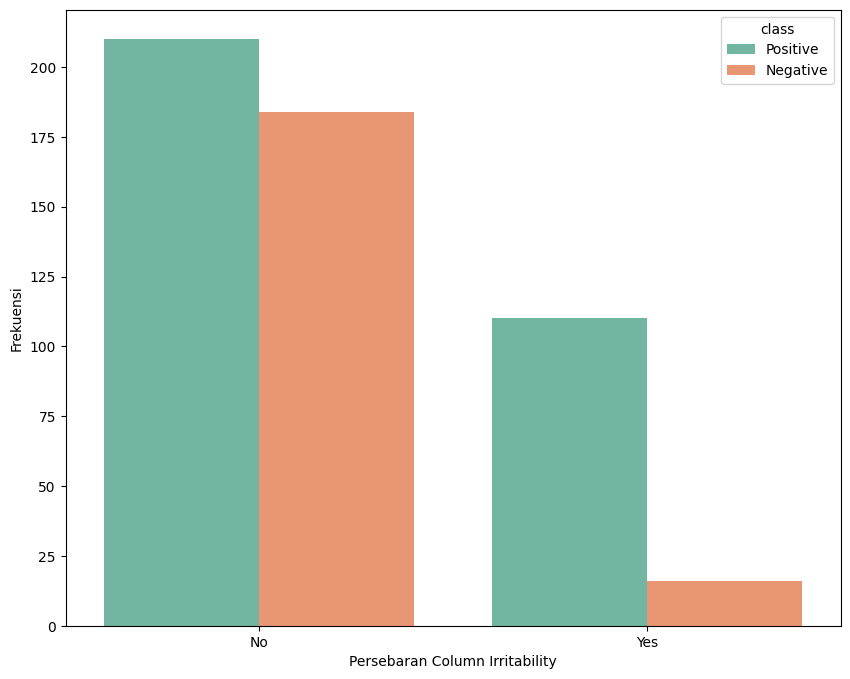

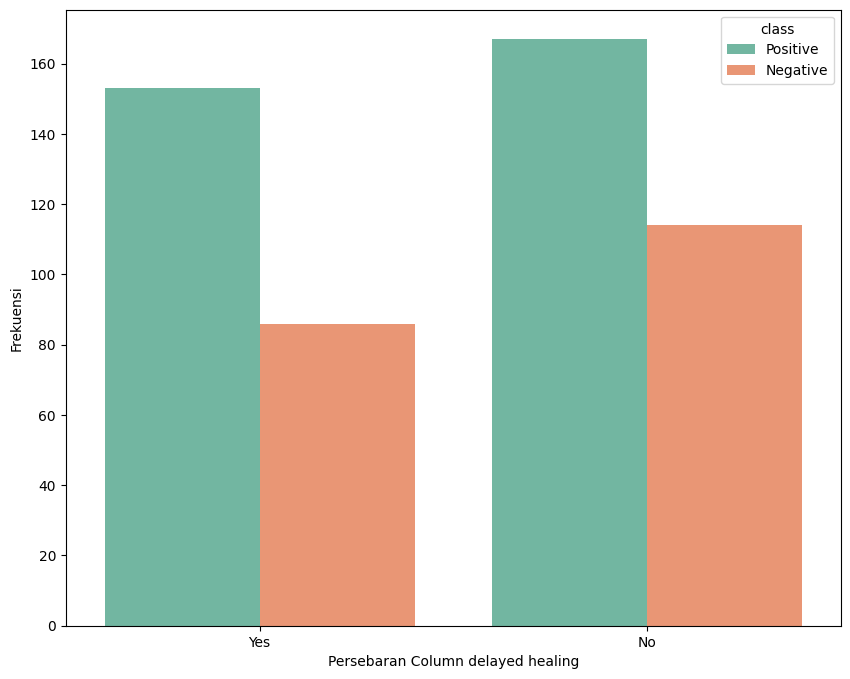

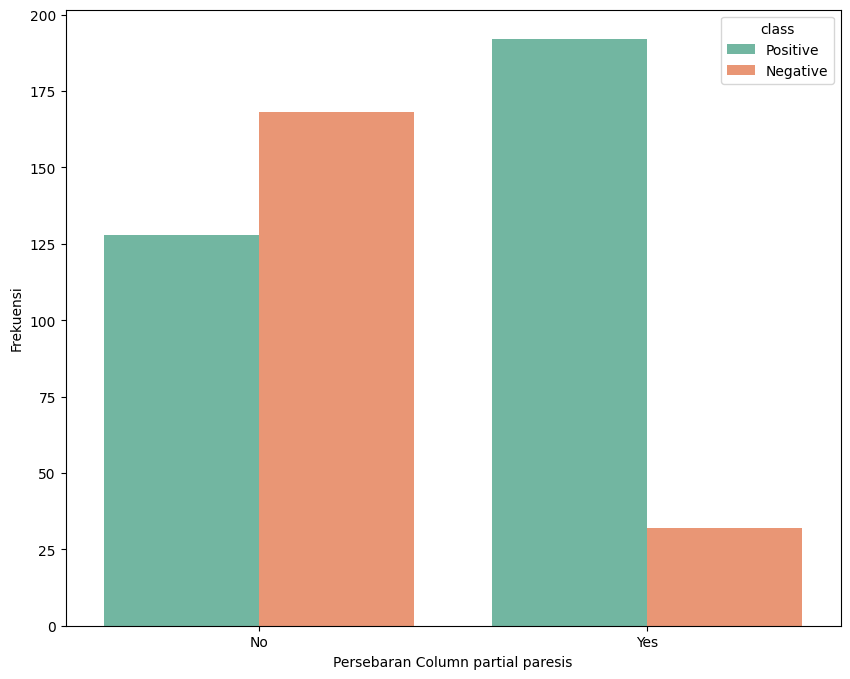

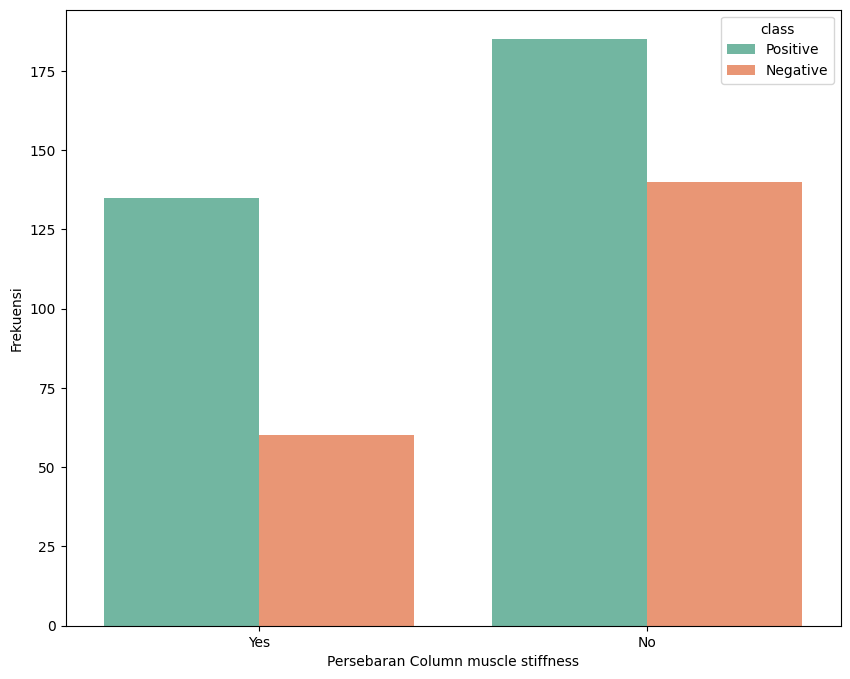

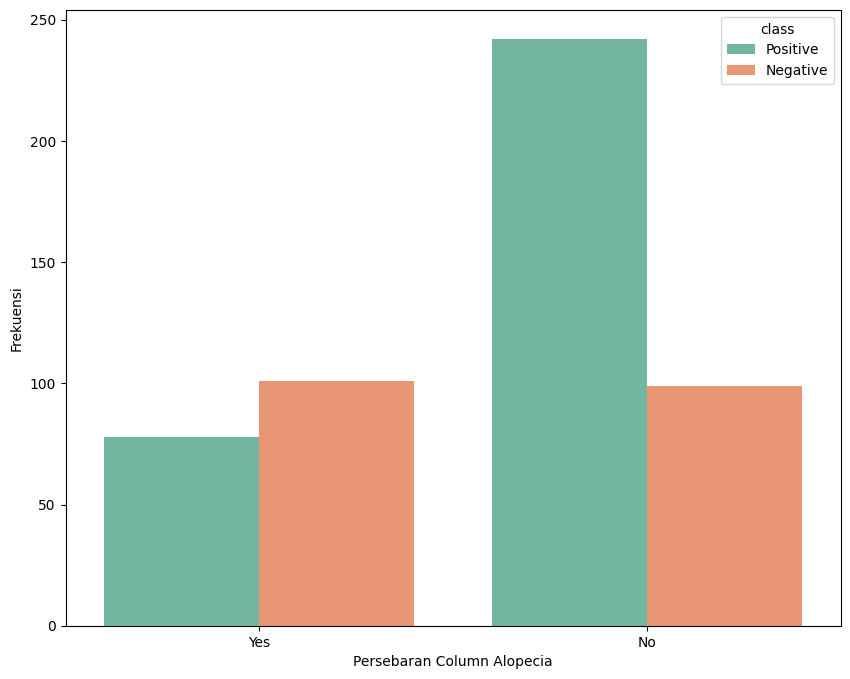

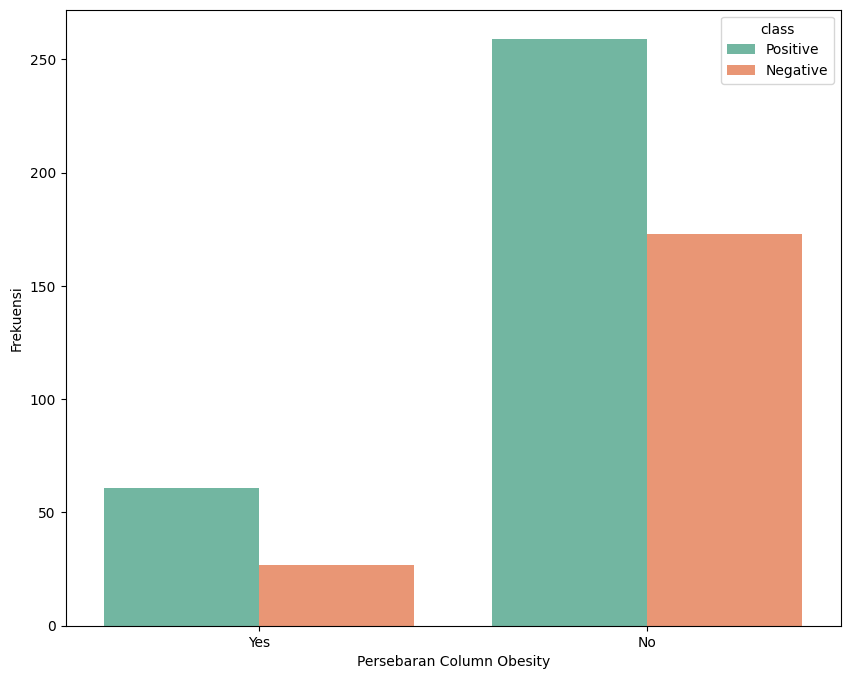

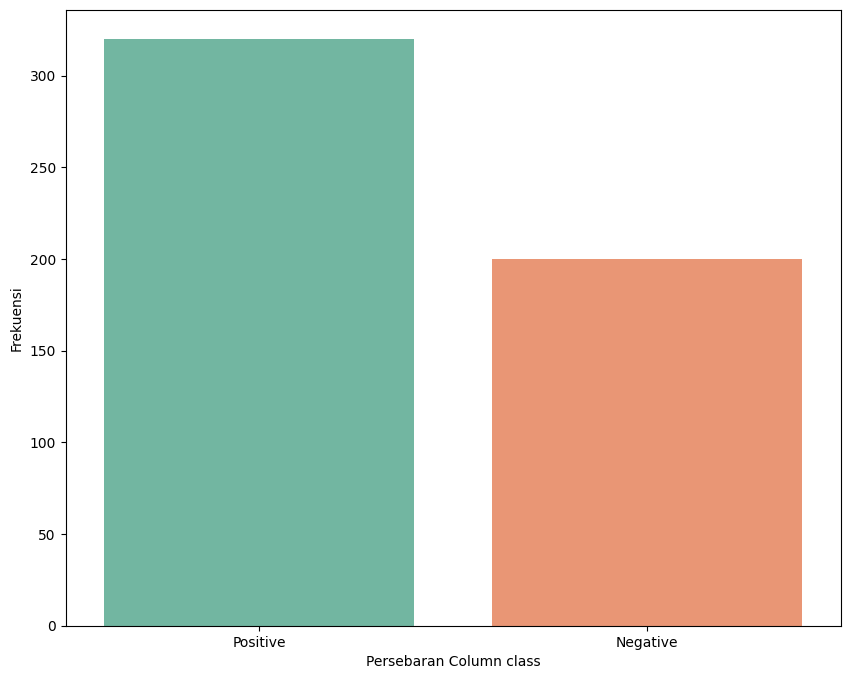

In [172]:
for col in df.select_dtypes(include='object'):
    plt.figure(figsize=(10, 8))
    sns.countplot(df, x=col, hue='class', palette='Set2')
    plt.xlabel(f"Persebaran Column {col}")
    plt.ylabel("Frekuensi")
    plt.show()

Text(0.5, 1.0, 'Diagnosis Berdasarkan Umur Dan Gender')

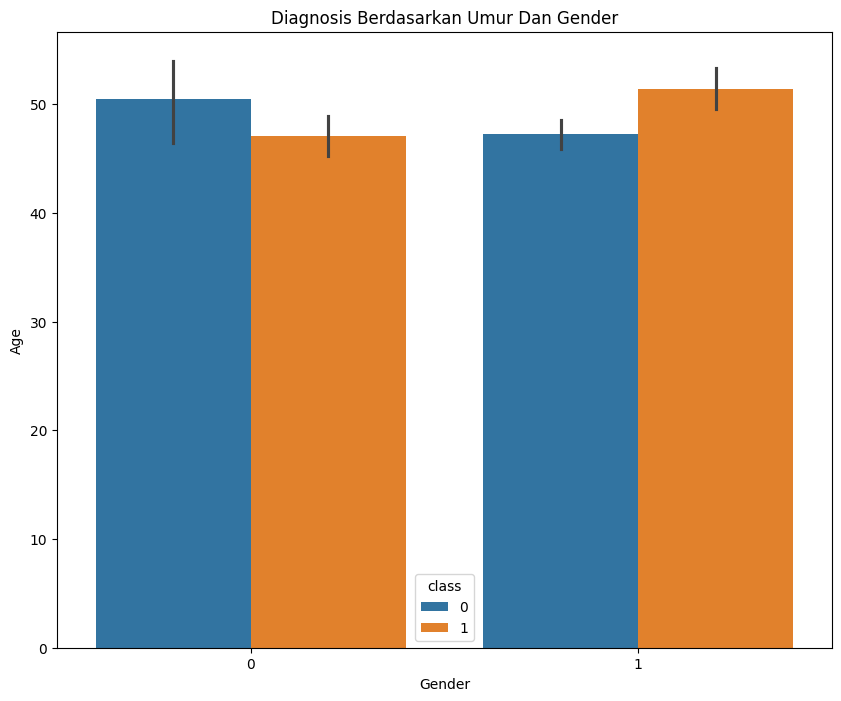

In [203]:
plt.figure(figsize=(10, 8))
sns.barplot(df, x='Gender', y='Age', hue='class')
plt.title("Diagnosis Berdasarkan Umur Dan Gender")

Text(0.5, 1.0, 'Diagnosis Berdasarkan Umur Dan Penurunan Berat Badan Mendadak')

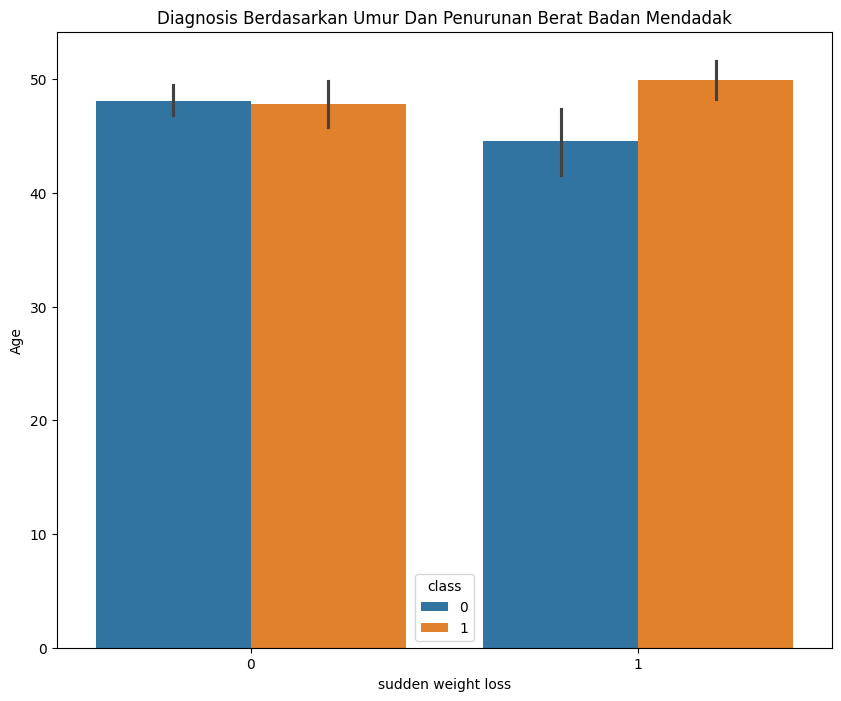

In [204]:
plt.figure(figsize=(10, 8))
sns.barplot(df, x='sudden weight loss', y='Age', hue='class')
plt.title("Diagnosis Berdasarkan Umur Dan Penurunan Berat Badan Mendadak")

Text(0.5, 1.0, 'Diagnosis Berdasarkan Umur Dan Kelelahan')

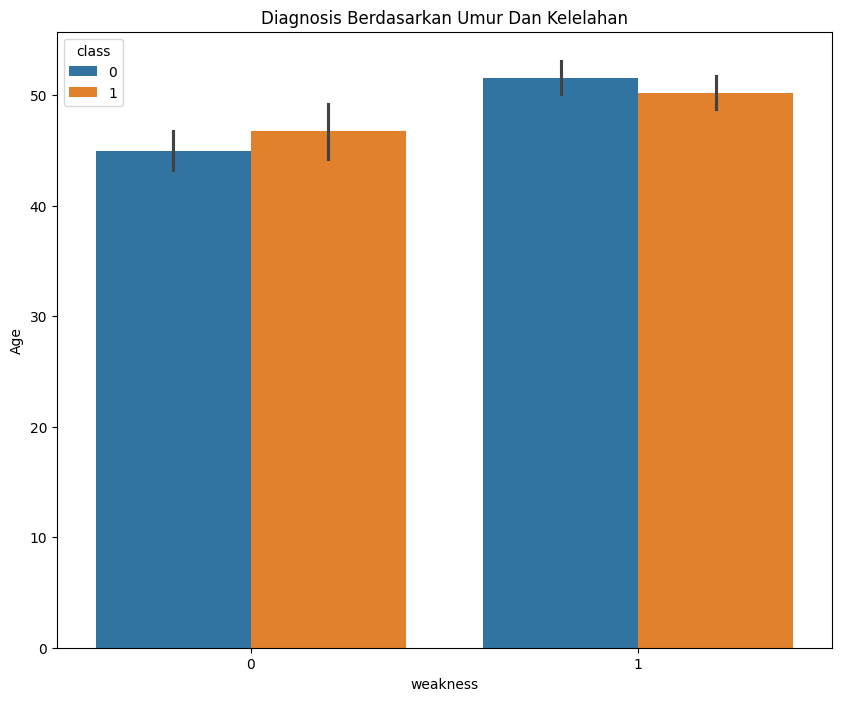

In [205]:
plt.figure(figsize=(10, 8))
sns.barplot(df, x='weakness', y='Age', hue='class')
plt.title("Diagnosis Berdasarkan Umur Dan Kelelahan")

Text(0.5, 1.0, 'Diagnosis Berdasarkan Umur Dan Penglihatan Kabur')

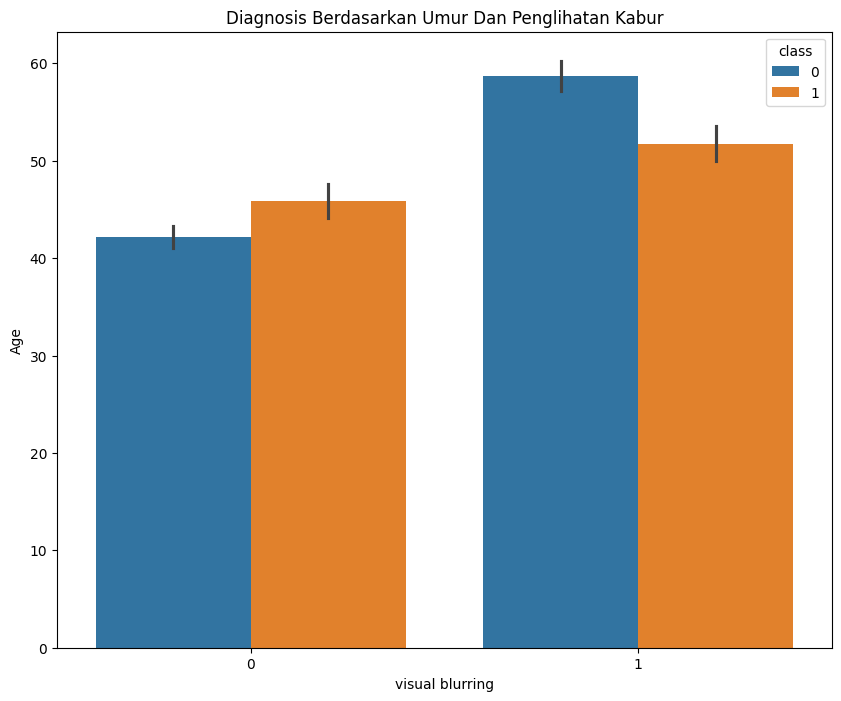

In [206]:
plt.figure(figsize=(10, 8))
sns.barplot(df, x='visual blurring', y='Age', hue='class')
plt.title("Diagnosis Berdasarkan Umur Dan Penglihatan Kabur")

Text(0.5, 1.0, 'Diagnosis Berdasarkan Umur Dan Ketidakstabilan Emosi')

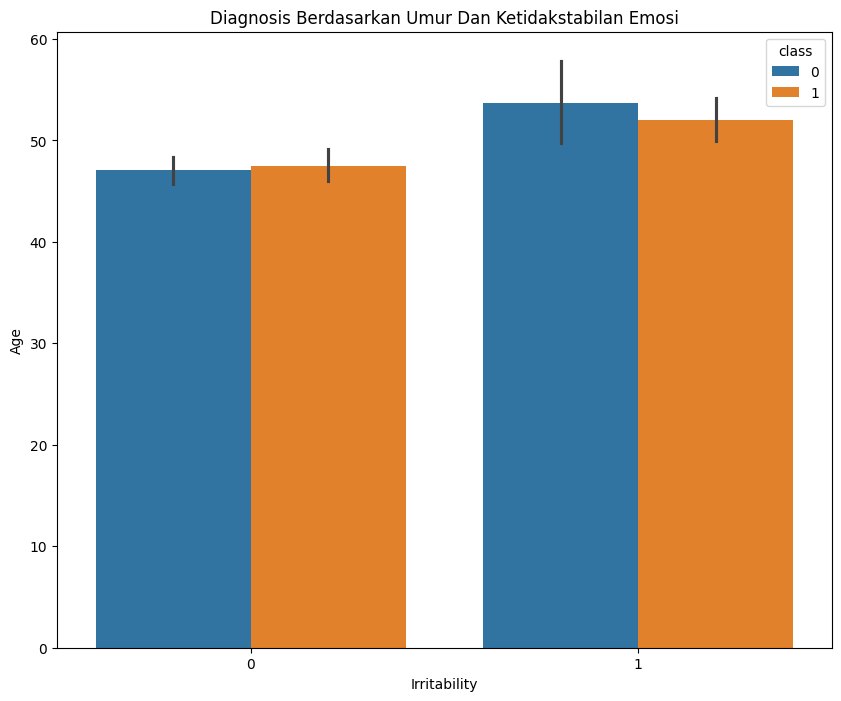

In [207]:
plt.figure(figsize=(10, 8))
sns.barplot(df, x='Irritability', y='Age', hue='class')
plt.title("Diagnosis Berdasarkan Umur Dan Ketidakstabilan Emosi")

## C. Data Preprocessing

### C.1 Encoding/Mapping

In [173]:
for cols in df.select_dtypes('object'):
    df[cols] = df[cols].astype('category').cat.codes
    
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


### C.2 Resampling Label

In [175]:
major_label = df[df['class'] == 1]
minor_label = df[df['class'] == 0]
target = (len(major_label))

minor_label_oversampled = minor_label.sample(n=target, replace=True, random_state=42)

df = pd.concat([major_label, minor_label_oversampled])

In [ ]:
# df.duplicated().sum()

In [177]:
# df.drop_duplicates(inplace=True)

<Axes: xlabel='class'>

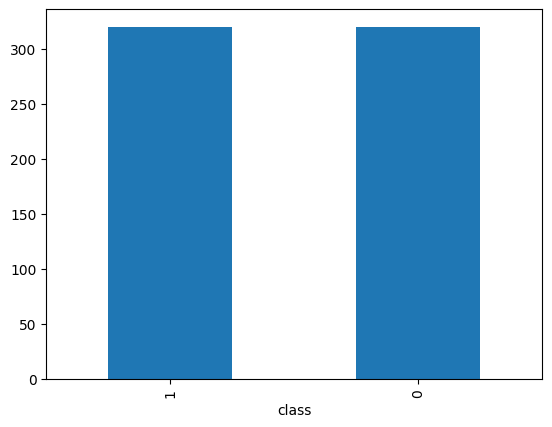

In [178]:
df['class'].value_counts().plot(kind='bar')

### B.3 Multivariate Analysis

<Axes: >

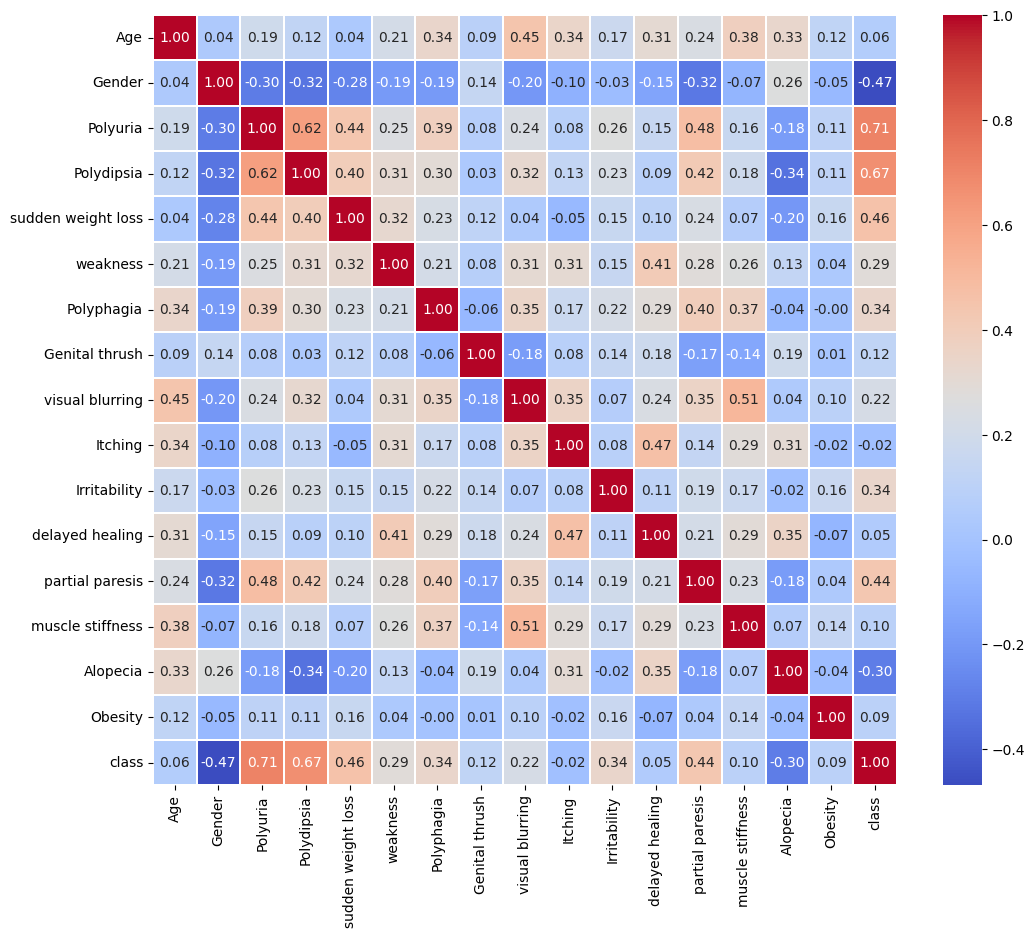

In [208]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=1.1)

## Insight

### Data Overview:

####
- Tidak ada outlier
- Tidak ada Missing Values
- Terdapat 269 data duplicates
- Terdapat outlier (namun tidak kami tangani karena ini dari kusinoner dan mengambil rata2 usia masyarakat bangladesh)

### Exploratory Data Analysis:

#### 1. Univariate
- Data target atau kelas mengalami imbalanced
- Columns usia persebaranya normal (rentang antara 30 - 60) artinya orang dewasa cenderung khawatir jika terkena diabetes

#### 2. Bivariate
A. 
- Gender perempuan lebih rentan terkena diabetes
- Orang yang sering buang air kecil atau berlebihan lebih rentan terkena diabetes
- Orang yang sering haus lebih rentan terkena diabetes
- Orang yang mengalami penurunan berat badan secara mendadak lebih rentan terkena diabetes
- Orang yang merasa lelah secara berlebihan lebih rentan terkena diabetes
- Orang yang memiliki nafsu makan berlebihan lebih rentan terkena diabetes
- Infeksi jamur tidak ada hubunganya dengan diabetes
- Orang yang memiliki pengelihatan kabur lebih rentan terkena diabetes
- Gatal Gatal pada kulit tidak ada hubungnya dengan dibetes
- Orang orang yang sering emosi tidak ada hubunganya dengan diabetes
- Kesulitan Menggerakan otot tidak ada hubunganya dengan diabetes
- Rambut rontok tidak ada hubunganya dengan diabetes
- Obesitas tidak ada hubunganya dengan diabetes

B.
- Gender laki2 dan perempuan pada usia 47 keatas lebih rentan terkena diabetes
- Penurunan berat badan mendadak pada usi 49 ke atas lebih rentan terkena diabetes
- Kelelahan secara berlebihan pada usia 50 bisa jadi tanda tanda terkena diabetes
- Pengelihatan kabur pada usia 50 bisa jadi tanda tanda terkena diabetes namun bisa jadi karena memang penyakit faktor usia
- Mudah marah pada usia 50 keatas bisa jadi tanda tanda terkena diabetes namun bisa jadi juga masalah beban pikiran

#### 3. Multivariate
Fitur yang paling berkorelasi dengan target adalah:
- Sering buang air kecil
- Sering merasa haus
- Jenis kelamin
- Kehilangan berat badan secara mendadak
- Nafsu makan berlebihan 
- Kelemahan pada fungsi otot
- Mudah marah / emosi

### Preprocessing:

####
- Handling columns duplikat
- Encoding kategorik columns

## D. Modelling

### D.1 Defining X (Feature) and y (Target) Variables

In [179]:
X_data = df.drop(columns=['class', 'Age'])
y_data = df['class']

### D.2 Splitting Data Train and Data Test (80:20)

In [180]:
def stratified_split(X_data, y_data, train_size=0.8, random_state=42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y_data):
        class_idx = np.where(y_data == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        x_train_list.append(X_data.iloc[idx[:split_ratio]])
        x_test_list.append(X_data.iloc[idx[split_ratio:]])
        y_train_list.append(y_data.iloc[idx[:split_ratio]])
        y_test_list.append(y_data.iloc[idx[split_ratio:]])
        
    x_train = pd.concat(x_train_list).reset_index(drop=True)
    x_test = pd.concat(x_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = stratified_split(X_data, y_data)

In [181]:
print("Data Positif Diabetes Pada Data Asli")
print(np.mean(y_data == 1))

print("\n========== Setelah Stratified Split ==========")
print("Data Positif Diabetes Pada Data Train")
print(np.mean(y_train == 1))
print("----------------------------------------------")
print("Data Positif Diabetes Pada Data Test")
print(np.mean(y_test == 1))

Data Positif Diabetes Pada Data Asli
0.5

========== Setelah Stratified Split ==========
Data Positif Diabetes Pada Data Train
0.5
----------------------------------------------
Data Positif Diabetes Pada Data Test
0.5


### D.3 Decision Tree 💖💖💖💖💖

#### Menghitung Gini Impurity Terbaik

In [182]:
def hitung_gini(groups, classes):
    n_instance = float(sum([len(groups) for group in groups]))
    gini = 0.0
    
    for group in groups:
        size = float(len(group))
        if size == 0:
            continue
        
        score = 0.0
        y_group = group.iloc[:, -1]
        
        for class_val in classes:
            p = (y_group == class_val).sum() / size
            score += p ** 2
        gini += (1.0 - score) * (size / n_instance)
    return gini 

#### Mendefinisikan Fungsi Untuk Splitting Data

In [183]:
def hitung_split(df, feat_idx, threshold):
    left = df[df.iloc[:, feat_idx] < threshold]
    right = df[df.iloc[:, feat_idx] >= threshold]

    return left, right

#### Mencari Data Split Terbaik (Gini Gain Terbesar)

In [184]:
def get_best_split(df, classes):
    best_gini = float('inf')
    best_split = {}
    n_features = df.shape[1] - 1
    
    for feat_idx in range(n_features):
        for index, row in df.iterrows():
            groups = hitung_split(df, feat_idx, row.iloc[feat_idx])
            gini = hitung_gini(groups, classes)
            
            if gini < best_gini:
                best_gini = gini
                best_split = {
                    'feat_idx' : feat_idx,
                    'val' : row.iloc[feat_idx],
                    'groups' : groups
                }
    return best_split

#### Membangun Pohon (Recursive)

In [185]:
def to_terminal(group):
    return group.iloc[:, -1].mode()[0]

def build_tree(df, classes, depth, max_depth):
    root = get_best_split(df, classes)
    if not root:
        return to_terminal(df)
    
    left, right = root['groups']
    del(root['groups'])
    
    if len(left) == 0 or len(right) == 0:
        no_split_data = pd.concat([left, right])
        root['left'] = root['right'] = to_terminal(no_split_data)
        return root
    
    if depth >= max_depth:
        root['left'] = to_terminal(left)
        root['right'] = to_terminal(right)
        return root
    
    root['left'] = build_tree(left, classes, depth + 1, max_depth)
    root['right'] = build_tree(right, classes, depth + 1, max_depth)
    return root

#### Mendefinisikan Fungsi Untuk Prediksi (Node dan Tree)

In [186]:
def predict_row(node, row):
    if not isinstance(node, dict):
        return node
    
    if row.iloc[node['feat_idx']] < node['val']:
        return predict_row(node['left'], row)
    else:
        return predict_row(node['right'], row)
    
def predict_batch(tree, df_test):
    predictions = []
    for index, row in df_test.iterrows():
        prediction = predict_row(tree, row)
        predictions.append(prediction)
    return predictions

## E. Evaluasi

### E.1 Memprediksi Data Test

1. Menggunakan Train Data (Gabungan dari x_train dan y_train)
2. Menggunakan Unique Classes (Semua Class yang ada di y_train)
3. Membangun Pohon (Menggunakan method recursive "build_tree")
4. Memprediksi Hasil (Dari data testing dan data training)

In [ ]:
train_data = pd.concat([x_train, y_train], axis=1)
# train_data_test = pd.concat([x_train[['Polyuria', 'sudden weight loss', 'Gender', 'partial paresis']], y_train], axis=1)

unique_classes = y_train.unique()

my_tree = build_tree(train_data, unique_classes, depth=0, max_depth=6)
# my_tree_test = build_tree(train_data_test, unique_classes, depth=0, max_depth=6)

predictions_test = predict_batch(my_tree, x_test)
predictions_train = predict_batch(my_tree, x_train)

### E.2 Akurasi Model

#### Akurasi Data Testing

In [202]:
accuracy_test = (y_test == predictions_test).mean()
print(f"{accuracy_test:.2f}")

0.98


#### Akurasi Data Training

In [189]:
accuracy_train = (y_train == predictions_train).mean()
print(f"{accuracy_train:.2f}")

0.99


### E.3 Confusion Matrix

1. True Positive = Model menebak positif pada data test dan ternyata hasil aslinya juga positif
2. False Positive = Model menebak positif pada data test dan ternyata hasil aslinya negatif
3. True Negative = Model menebak negatif pada data test dan ternyata hasil aslinya juga negatif
4. False Negative = Model menebak negatif pada data test dan ternyata hasil aslinya positif

In [190]:
y_test_array = np.array(y_test)
predictions_array = np.array(predictions_test)

TP = np.sum((y_test_array == 1) & (predictions_array == 1))
FP = np.sum((y_test_array == 0) & (predictions_array == 1))
TN = np.sum((y_test_array == 0) & (predictions_array == 0))
FN = np.sum((y_test_array == 1) & (predictions_array == 0))

print(f"True Positive: {TP}")
print(f"False Positive: {FP}")
print(f"True Negative: {TN}")
print(f"False Negative: {FN}")

True Positive: 62
False Positive: 1
True Negative: 63
False Negative: 2


### E.4 Precision Score

Seberapa akurat model menebak positif pada data test

In [191]:
precision = TP / (TP + FP)
print(f"{precision:.2f}")

0.98


### E.5 Recall Score

Seberapa akurat model mengingat data positif

In [192]:
recall = TP / (TP + FN)
print(f"{recall:.2f}")

0.97


### E.6 F-1 Score

Perpaduan skor precision (ketepatan) model dan recall (ingatan) model

In [193]:
f1 = 2 * (precision * recall / precision + recall) 
print(f"{f1:.2f}")

3.88


## F. GUI (Graphical User Interface)

### F.1 Rumus Prediksi

In [ ]:
# train_data = pd.concat([x_train, y_train], axis=1)

# unique_classes = y_train.unique()

# my_tree = build_tree(train_data, unique_classes, depth=0, max_depth=3)

# predictions_test = predict_batch(my_tree, x_test)
# predictions_train = predict_batch(my_tree, x_train)

### F.2 GUI TKinter

In [210]:
import tkinter as tk
from tkinter import *

allcolumns = ['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
        'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
        'Irritability', 'delayed healing', 'partial paresis',
        'muscle stiffness', 'Alopecia', 'Obesity']

def prediksi():
    polyuria = float(input_polyuria.get())
    gender = float(input_gender.get())
    weightloss = float(input_weightloss.get())
    parparesis = float(input_parparesis.get())
    
    data_dict = {col: 1 for col in allcolumns}
    data_dict['Polyuria'] = polyuria
    data_dict['Gender'] = gender
    data_dict['sudden weight loss'] = weightloss
    data_dict['partial paresis'] = parparesis
    
    df_baru = pd.DataFrame([data_dict])
    
    hasil_dectree = predict_batch(my_tree, df_baru)       
    hasil_prediksi.config(text=f'{hasil_dectree}')

root = tk.Tk()
root.title("Decision Tree Classification - Diabetes Prediction")
root.geometry("600x500")
root.config(bg="#691313")

header = Frame(root, bg="#b29e4c")
header.pack(fill=X)
Label(header, text="Diabetes Predictor", font=('Arial', 18, 'bold',), fg='black', bg="#b29e4c").pack()
Label(header,text="Decision Tree Classification", font=('Arial', 14), fg='black', bg="#b29e4c").pack()

main = Frame(root)
main.pack(pady=10)

aturan = Frame(main,  bg="#691313")
aturan.pack()
Label(aturan, text="Input Angka 0 Jika Tidak Relate | Input Angka 1 Jika Relate", font=('Arial', 10, 'bold'), fg='White', bg="#691313").pack(pady=(0, 30))

Label(aturan, text="1. Polyuria (Frekuensi buang air kecil yang berlebihan)", font=('Arial', 10, 'bold'), fg='White', bg="#691313").pack()
input_polyuria = Entry(aturan)
input_polyuria.pack()
Label(aturan, text="2. Gender (Jenis kelamin 0 = Pria, 1 = Wanita)", font=('Arial', 10, 'bold'), fg='White', bg="#691313").pack()
input_gender = Entry(aturan)
input_gender.pack()
Label(aturan, text="3. Sudden Weight Loss (Penurunan berat badan yang tiba-tiba tanpa sebab jelas)", font=('Arial', 10, 'bold'), fg='White', bg="#691313").pack()
input_weightloss = Entry(aturan)
input_weightloss.pack()
Label(aturan, text="4. Partial Paresis (Kelemahan otot sebagian atau kelumpuhan ringan)", font=('Arial', 10, 'bold'), fg='White', bg="#691313").pack()
input_parparesis = Entry(aturan)
input_parparesis.pack()

hasil = Frame(root)
hasil.pack(pady=20)
button = Button(hasil, text='Prediksi Diabetes', bg='#b29e4c', command=prediksi)
button.pack()

hasil_prediksi = Label(hasil, text='-', fg='white', bg="#691313")
hasil_prediksi.pack(fill=X)


root.mainloop()

In [ ]:
# import tkinter as tk
# from tkinter import *

# allcolumns = ['Gender', 'Polyuria', 'sudden weight loss','partial paresis']

# def prediksi():
#     polyuria = float(input_polyuria.get())
#     gender = float(input_gender.get())
#     weightloss = float(input_weightloss.get())
#     parparesis = float(input_parparesis.get())
    
#     data_dict = {col: 0 for col in allcolumns}
#     data_dict['Polyuria'] = polyuria
#     data_dict['Gender'] = gender
#     data_dict['sudden weight loss'] = weightloss
#     data_dict['partial paresis'] = parparesis
    
#     df_baru = pd.DataFrame([data_dict])
    
#     hasil_dectree = predict_batch(my_tree_test, df_baru)       
#     hasil_prediksi.config(text=f'{hasil_dectree}')

# root = tk.Tk()
# root.title("Decision Tree Classification - Diabetes Prediction")
# root.geometry("600x500")
# root.config(bg="#691313")

# header = Frame(root, bg="#b29e4c")
# header.pack(fill=X)
# Label(header, text="Diabetes Predictor", font=('Arial', 18, 'bold',), fg='black', bg="#b29e4c").pack()
# Label(header,text="Decision Tree Classification", font=('Arial', 14), fg='black', bg="#b29e4c").pack()

# main = Frame(root)
# main.pack(pady=10)

# aturan = Frame(main,  bg="#691313")
# aturan.pack()
# Label(aturan, text="Input Angka 0 Jika Tidak Relate | Input Angka 1 Jika Relate", font=('Arial', 10, 'bold'), fg='White', bg="#691313").pack(pady=(0, 30))

# Label(aturan, text="1. Polyuria (Frekuensi buang air kecil yang berlebihan)", font=('Arial', 10, 'bold'), fg='White', bg="#691313").pack()
# input_polyuria = Entry(aturan)
# input_polyuria.pack()
# Label(aturan, text="2. Gender (Jenis kelamin 0 = Pria, 1 = Wanita)", font=('Arial', 10, 'bold'), fg='White', bg="#691313").pack()
# input_gender = Entry(aturan)
# input_gender.pack()
# Label(aturan, text="3. Sudden Weight Loss (Penurunan berat badan yang tiba-tiba tanpa sebab jelas)", font=('Arial', 10, 'bold'), fg='White', bg="#691313").pack()
# input_weightloss = Entry(aturan)
# input_weightloss.pack()
# Label(aturan, text="4. Partial Paresis (Kelemahan otot sebagian atau kelumpuhan ringan)", font=('Arial', 10, 'bold'), fg='White', bg="#691313").pack()
# input_parparesis = Entry(aturan)
# input_parparesis.pack()

# hasil = Frame(root)
# hasil.pack(pady=20)
# button = Button(hasil, text='Prediksi Diabetes', bg='#b29e4c', command=prediksi)
# button.pack()

# hasil_prediksi = Label(hasil, text='-', fg='white', bg="#691313")
# hasil_prediksi.pack(fill=X)


# root.mainloop()